### TITANIC DATASET ANALYSIS - BASIC COMMANDS

In [1]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Read from file 
datafull = pd.read_csv('titanic.csv')

### Basic Dataset details

In [2]:
# Check total number of rows and columns

print("Total Rows:" ,datafull.shape[0])
print("Total Columns:",datafull.shape[1])

print("Column Names:",datafull.columns)

Total Rows: 891
Total Columns: 12
Column Names: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
#Basic Dataset analysis commands

datafull.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Analysing unique values

for i in datafull.columns:
    print("Column Name:",i ,"Number of unique Values:",len(datafull[i].unique()))

Column Name: PassengerId Number of unique Values: 891
Column Name: Survived Number of unique Values: 2
Column Name: Pclass Number of unique Values: 3
Column Name: Name Number of unique Values: 891
Column Name: Sex Number of unique Values: 2
Column Name: Age Number of unique Values: 89
Column Name: SibSp Number of unique Values: 7
Column Name: Parch Number of unique Values: 7
Column Name: Ticket Number of unique Values: 681
Column Name: Fare Number of unique Values: 248
Column Name: Cabin Number of unique Values: 148
Column Name: Embarked Number of unique Values: 4


As we can see above certain columns have unique values as many number of rows ignore those columns

### Removing unnecessary columns from dataset

In [5]:
# How to remove columns from dataset

datafull = datafull.drop(columns=['PassengerId','Ticket','Cabin'])

print("List of columns",datafull.columns)

List of columns Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


### Analysing and removing NA values 

In [6]:
# Checking for Na values in dataset

datafull.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
# For embarked column remove the rows

datafull =datafull.dropna(subset=['Embarked'])


In [8]:
#Verify

datafull.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [9]:
# Dealing with age na values

Age_mean = np.round(datafull['Age'].mean())

print(Age_mean)

30.0


In [10]:
#Substitute values in Age column

datafull.loc[datafull.Age.isnull(),'Age'] = Age_mean

In [11]:
#Check for na values again

datafull.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Na values substituted successfully !

### Graphs

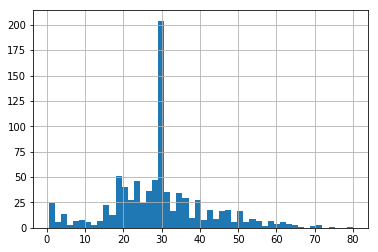

In [12]:
# Plotting some graphs

datafull.Age.hist(bins=50) #histogram

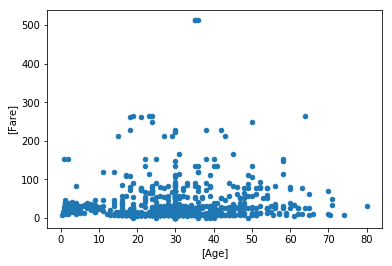

In [13]:
datafull.plot.scatter(x=['Age'],y=['Fare'])

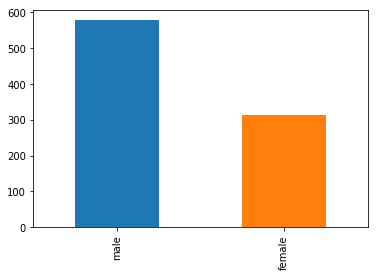

In [14]:
#Categorical variable Bar plot
datafull.Sex.value_counts().plot.bar()

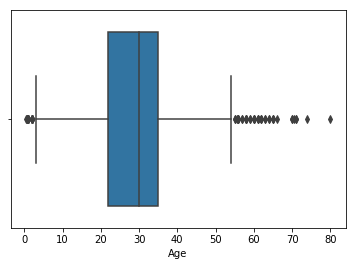

In [15]:
#Boxplot

import seaborn as sns

sns.boxplot(x=datafull['Age'])

### Detecting outliers and removing them

In [16]:
Q1 = datafull['Age'].quantile(0.25)
Q3 = datafull['Age'].quantile(0.75)
IQR = Q3 - Q1


upper_bound = Q3 + (1.5*IQR)
lower_bound = Q1 - (1.5*IQR)

print(lower_bound,upper_bound)

2.5 54.5


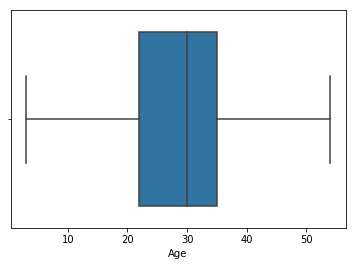

In [17]:
#Assigning values below lower bound to lower bound

datafull.loc[(datafull.Age < lower_bound),'Age'] = np.ceil(lower_bound) # Round reduces 2.5 to 2 which again appears as an outlier

#Assigning values above upper bound to upper bound
datafull.loc[(datafull.Age > upper_bound),'Age'] = np.round(upper_bound)

#Verification
import seaborn as sns

sns.boxplot(x=datafull['Age'])


### One Hot Encoding for Categorical Variables

In [18]:
datafull.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


#### Need to do one hot encoding for Embarked column and  Sex Column

In [19]:
datafull = pd.get_dummies(datafull,columns=["Sex"])

datafull.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,1,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1


In [20]:
datafull = pd.get_dummies(datafull,columns=["Embarked"])

datafull.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,1


In [22]:
#Drop name because it is not important

datafull = datafull.drop(columns=['Name'])

datafull.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [23]:
# Now the dataset is ready for train_test splitting

from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(datafull,datafull.Survived,test_size=0.3,random_state=123)

In [26]:
print("Training Data",X_train.shape[0] ,"rows")

print("Test Data",X_test.shape[0],"rows")

Training Data 622 rows
Test Data 267 rows


### -------------------------------Dataset is now ready to apply ML Algorithms--------------------------------------------------------------

### ------------------------------------------------------END------------------------------------------------------------------------------------------------